In [4]:
from utils import *
from trimesh import *
from optimal import OptimalSWF
from swf import *

import numpy as np
import matplotlib.pyplot as plt

In [5]:
subdivs = 11
upper = 4
base = np.linspace(0,(2*np.pi)*((subdivs-1)/subdivs),subdivs)
#base = np.append(base,base[0])

up = np.linspace(0,(2*np.pi)*((upper-1)/upper),upper)
#up = np.append(up,up[0])

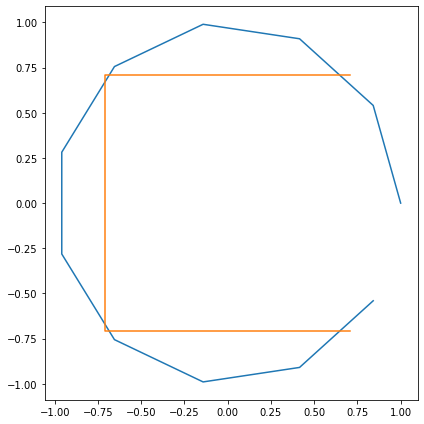

In [6]:
plt.figure(figsize=(6,6))
plt.plot(np.cos(base),np.sin(base))
plt.plot(np.cos(up+np.pi/4),np.sin(up+np.pi/4))
plt.tight_layout()

In [7]:
x_base = np.cos(base)
y_base = np.sin(base)
z_base = np.zeros(x_base.shape)
plane = np.vstack((x_base,y_base,z_base)).T
idx = [1,10,0,3,8,4,7,2,9,5,6]
plane = plane[idx]

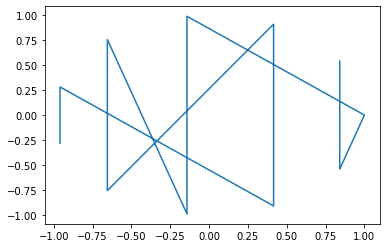

In [8]:
plt.plot(plane[:,0],plane[:,1])